### 1. Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Importing dataset

In [2]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### 3. Exploratory data analysis

In [3]:
print("Total startups in the dataset: {}".format(data.shape[0]))

Total startups in the dataset: 50


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

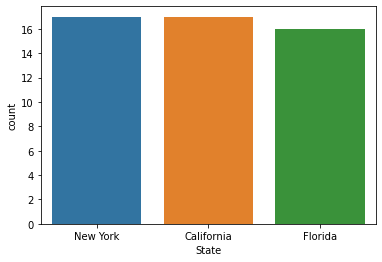

In [7]:
sns.countplot(data=data,x=data["State"])
plt.show()

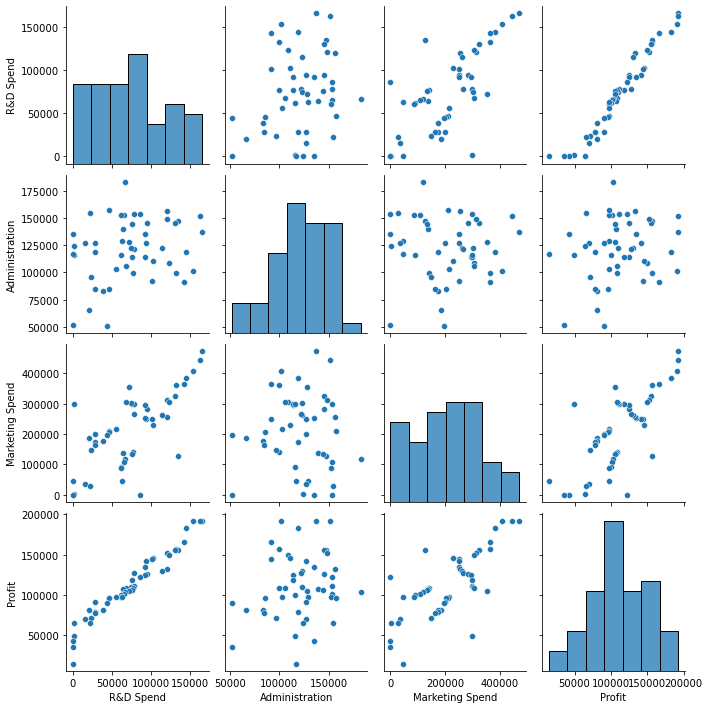

In [8]:
sns.pairplot(data=data)
plt.show()

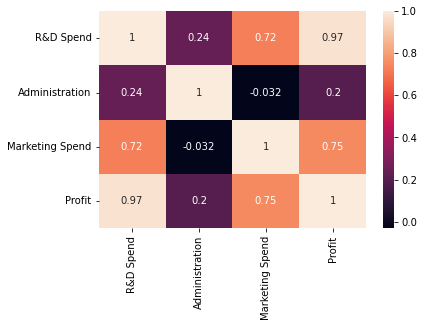

In [9]:
sns.heatmap(data.corr(),annot=True)
plt.show()

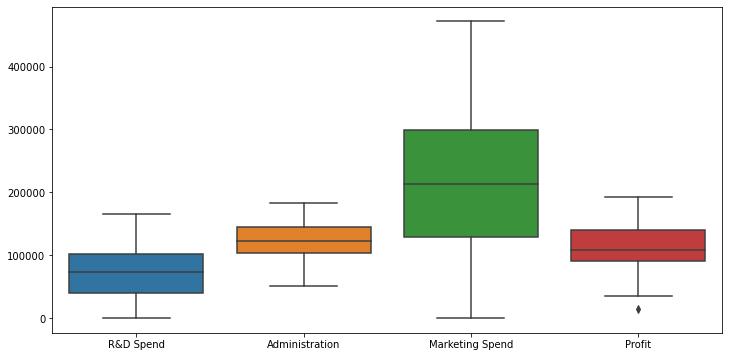

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.show()

In [11]:
iqr=data["Profit"].quantile(0.75)-data["Profit"].quantile(0.25)
print(iqr)

49627.07499999998


In [12]:
up=data["Profit"].quantile(0.75)+1.5*iqr
down=data["Profit"].quantile(0.25)-1.5*iqr

print(up,down)

214206.58999999997 15698.290000000023


In [13]:
outlier=[]
profit=data["Profit"]

for i in profit:
    if i>up:
        outlier.append(i)
        print("Up Outlier",i)
        
for i in profit:
    if i<down:
        outlier.append(i)
        print("Down Outlier",i)

Down Outlier 14681.4


In [14]:
data["Profit"]=data["Profit"].replace(outlier,data["Profit"].mean())

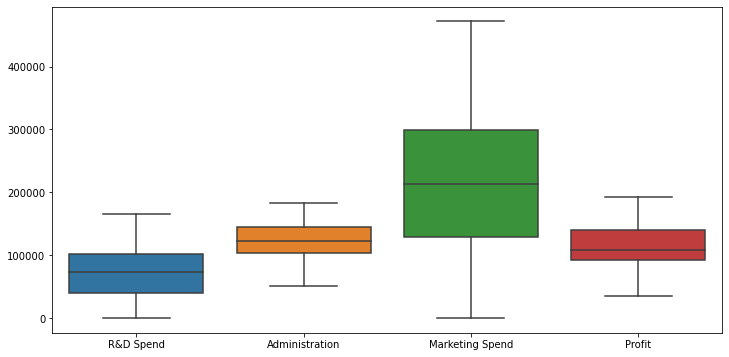

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.show()

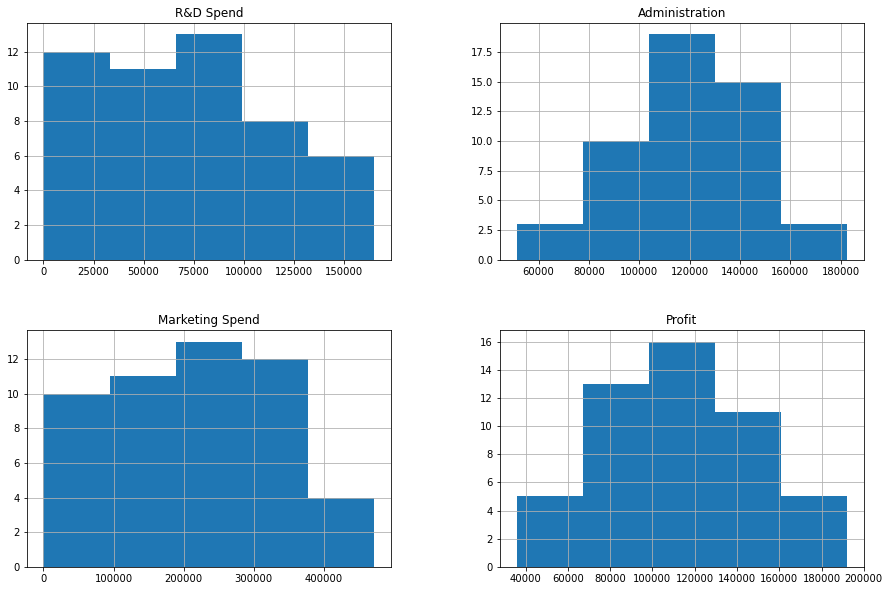

In [16]:
data.hist(figsize=(15,10),bins=5)
plt.show()

C:\Users\ngoc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


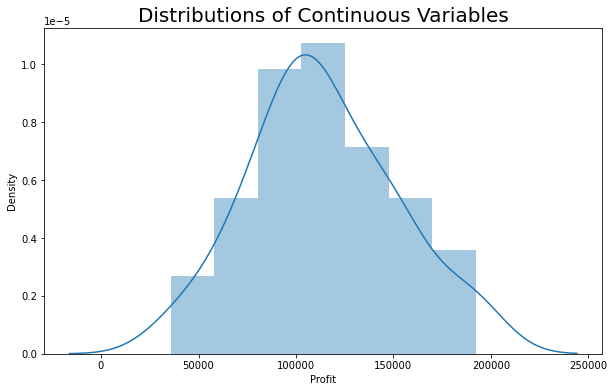

In [17]:
plt.figure(figsize=(10,6))
plt.title("Distributions of Continuous Variables", fontsize=20)
sns.distplot(data['Profit'])
plt.show()

### 4. Encoding

In [18]:
features=data.iloc[:,:-1]
target=data.iloc[:,-1]

In [19]:
features.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [20]:
target.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [21]:
# creating dummies
dum=pd.get_dummies(data['State'])
dum.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [22]:
features=pd.concat([data,dum],axis=1)
features.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [23]:
# Dropping state column
features.drop(['State'],axis=1,inplace=True)
features.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### 5. Splitting & model building

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.25,random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [26]:
lr.coef_

array([ 6.63072087e-16,  1.98171723e-16, -3.57373825e-16,  1.00000000e+00,
       -1.09949455e-13,  3.07887709e-13, -1.97938246e-13])

In [27]:
pd.DataFrame(lr.coef_,index=features.columns,columns=["Coefficients"]) 

,Coefficients
R&D Spend,6.630721e-16
Administration,1.981717e-16
Marketing Spend,-3.573738e-16
Profit,1.000000e+00
California,-1.099495e-13
Florida,3.078877e-13
New York,-1.979382e-13


### 6. Model evaluation

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr_mse = mean_squared_error(ytest,ypred)
print('Linear Regression MSE: ', mean_squared_error(ytest,ypred))
print('Linear Regression MAE: ', mean_absolute_error(ytest,ypred))
print('Linear Regression R2 score: ', r2_score(ytest,ypred))

Linear Regression MSE:  9.610566132308407e-22
Linear Regression MAE:  2.7984452362243947e-11
Linear Regression R2 score:  1.0


In [29]:
tr=lr.score(xtrain,ytrain)
te=lr.score(xtest,ytest)
print("Traning accuracy",tr)
print("Testing accuracy",te)

Traning accuracy 1.0
Testing accuracy 1.0


C:\Users\ngoc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

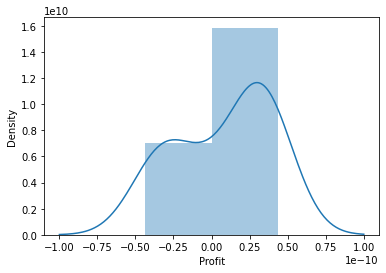

In [30]:
sns.distplot(ytest-ypred)

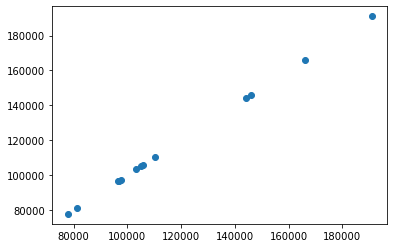

In [31]:
plt.scatter(ytest,ypred)